In [1]:
#This dataset contains "Dark Net" purchases made on the Agora marketplace from 2014 - 2015. First, it is important to
#understand what the "Dark Net" or "Dark Web" means. The "Dark Net" is an overlay network that can only be accessed
#with specific software or authorization and marketplaces on this net specialize in illegal goods and services, such as drugs
#computer hacking, and weapons sales. Goods and services are paid with the cryptocurrency bitcoin. 

#This dataset was exported from Kaggle. I believe data is interestng on many levels. First, bitcoin has grown in popularity
#recently with many known retailers accepting bitcoin as an alternate form of payment to cash and credit cards. 
#However, bitcoin's origins are closely tied with the "Dark Net" and the illegal purchases made on its marketplaces with 
#bitcoin being the medium of exchange. 
#Secondly, the "Dark Net" is not a topic that is particularly mainstream and thus not particularly well known. Unlike
#publically traded companies and stock market info, transactions on the "Dark Net" are not disclosed quarterly. I've been 
#curious as to what exactly is sold on the "Dark Net" and how much people spend on it.

#The data from Kaggle was somewhat dirty and has flaws. The price data in the dataset was originally
#expressed all in bitcoin. For simplicity, I have converted the transactions to USD. 
#At the start of 2014, the price of 1 bitcoin was approximately $750 USD. It must be noted that the price of bitcoin is 
#highly volatile. As such, the USD prices shown may not be entirely accurate. Also, abnormally high prices will be excluded
#as these prices could be faked or are wrong. 

#Questions to answer: 1. What is purchased the most on the Dark Net? 2. What subcategories are purchased the most on the 
#Dark Net? 3. What Vendor makes the most sales on the Dark Net?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import scipy

In [3]:
#df is the entire data set exported from Kaggle. Prior to uploading, I converted the bitcoin to USD in the csv and grouped
#the Categories given into high level categories. First, I would like to see what category is transacted the most on the
#Dark Net. 

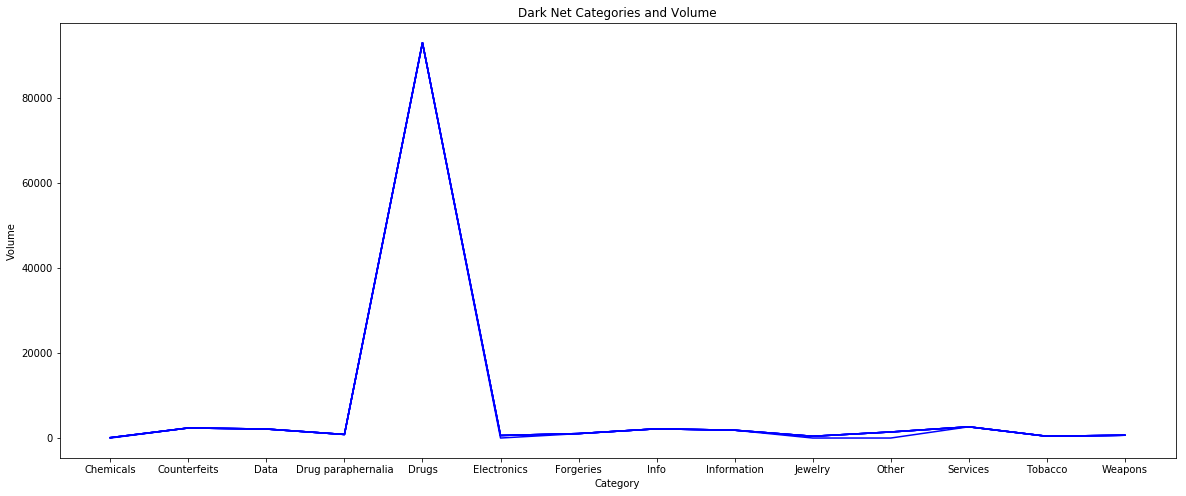

In [4]:
df = pd.read_csv('Darkweb_data_v7.csv')
plt.figure(figsize=(20,8))
plt.plot(df.groupby('SubCat 1').count(), color='blue')
plt.title('Dark Net Categories and Volume')
plt.ylabel('Volume')
plt.xlabel('Category')
plt.show()

In [5]:
Category = df['Category'].count()
Drug_Category = df.loc[lambda df: df['SubCat 1'] == 'Drugs', :].count()
print(Drug_Category.loc['Category'] / Category)

0.848279006155


In [6]:
#We see that Drugs are the category purchased the most on the "Dark Net." 
#In fact, there's an 85% chance that a transaction made on the Dark Net will be Drugs 
#As Drugs make up the lion share of purcahses, we will spend amore time analyzing the drug purchases exclusively
#Let's take a look at the average price of a drug transaction in the data set.

In [7]:
df_drug = df.loc[lambda df: df['SubCat 1'] == 'Drugs', :]
df_drug['USD Price'].mean()

18737.102056319654

In [8]:
df_drug['USD Price'].max()

97797067.269999996

In [9]:
#The average price of drug transactions on the "Dark Net" is nearly $19K. This seems high. By looking at the max USD price,
#I found the highest price of a drug transaction in the data set is $97M. To narrow the scope and to remove outliers, let's 
#re-analyze by focusing on purchases below $1,000 USD. This should remove most the outliers.

In [10]:
df2 = df_drug.loc[lambda df: df_drug['USD Price'] <= 1000, :]
df2['USD Price'].mean()

279.90429033577539

In [11]:
#By removing some outliers, the average price of a drug transaction becomes roughly $280 which seems more reasonable. 
#Second, let's take a look at what specific drugs are purchased.

In [12]:
df2.groupby('SubCat2').count()

,Vendor,Category,SubCat 1,Price,Bitcoin Price,USD Price
SubCat2,,,,,,
Barbiturates,25,25,25,25,25,25
Benzos,4203,4203,4203,4203,4203,4203
Cannabis,22831,22831,22831,22831,22831,22831
Dissociatives,1171,1171,1171,1171,1171,1171
Ecstasy,9229,9229,9229,9229,9229,9229
Opioids,5108,5108,5108,5108,5108,5108
Other,688,688,688,688,688,688
Prescription,4904,4904,4904,4904,4904,4904
Psychedelics,6523,6523,6523,6523,6523,6523


In [13]:
drug_type = df2.groupby('SubCat2').sum()
drug_type.loc[:, 'USD Price']

SubCat2
Barbiturates     6.331801e+03
Benzos           9.940419e+05
Cannabis         6.506321e+06
Dissociatives    3.726034e+05
Ecstasy          2.902564e+06
Opioids          1.434185e+06
Other            1.689097e+05
Prescription     1.063671e+06
Psychedelics     1.659258e+06
RCs              4.128455e+05
Steroids         5.798080e+05
Stimulants       2.725011e+06
Weight loss      5.231543e+04
Name: USD Price, dtype: float64

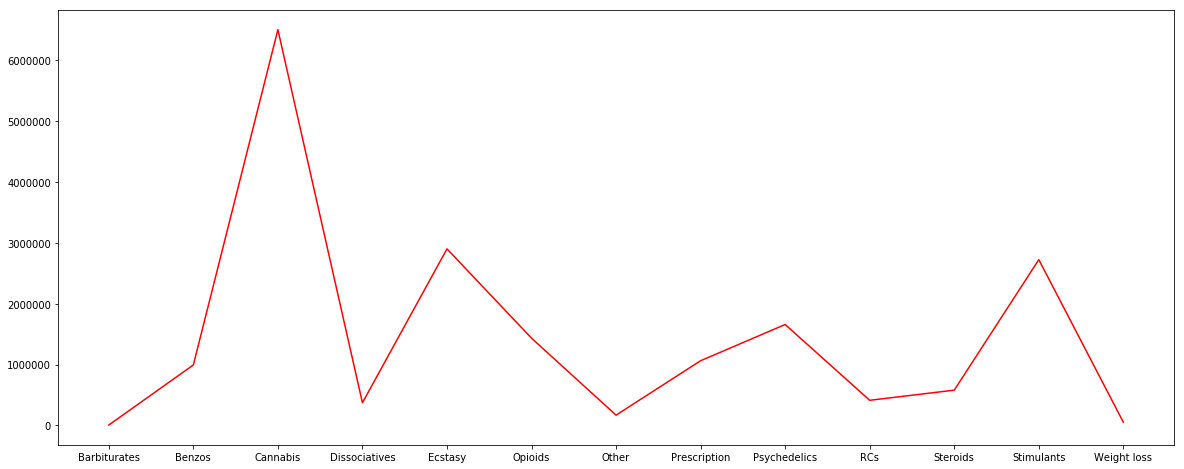

In [14]:
plt.figure(figsize=(20,8))
plt.plot(drug_type.loc[:, 'USD Price'], color='red')
plt.show()

In [15]:
#Cannabis is the most bought drug on the Dark Net followed by Ecstasy and Stimulants. 
#Let's take a look at the sales of these top 3 purchased drugs, reviewing total sales and average sale price.

In [16]:
Cannabis = df2.loc[lambda df: df2['SubCat2'] == 'Cannabis', :]
Cannabis_sum = Cannabis['USD Price'].sum()
Cannabis_avg = Cannabis['USD Price'].mean()
print(Cannabis_sum)
print(Cannabis_avg)

Ecstasy = df2.loc[lambda df: df2['SubCat2'] == 'Ecstasy', :]
Ecstasy_sum = Ecstasy['USD Price'].sum()
Ecstasy_avg = Ecstasy['USD Price'].mean()
print(Ecstasy_sum)
print(Ecstasy_avg)

Stimulants = df2.loc[lambda df: df2['SubCat2'] == 'Stimulants', :]
Stim_sum = Stimulants['USD Price'].sum()
Stim_avg = Stimulants['USD Price'].mean()
print(Stim_sum)
print(Stim_avg)

6506321.11142
284.977491631
2902564.16917
314.504731734
2725010.62985
312.393744107


In [17]:
#Cannbis was the most bought drug on the dark net accounting for $6.5M and an average price of $284.
#The average price of ecstacy was higher than that of Cannbis at $314. Total Ecstasy sales equal $2.9M
#Sales of stimulants were close to those of Ecstacy at $2.7M and an average sale price of $312. 
#Interesting that Cannabis is so widely popular on the dark net, total sales over 2x of Ecstasy sales.

#Let's look at this graphically with histograms

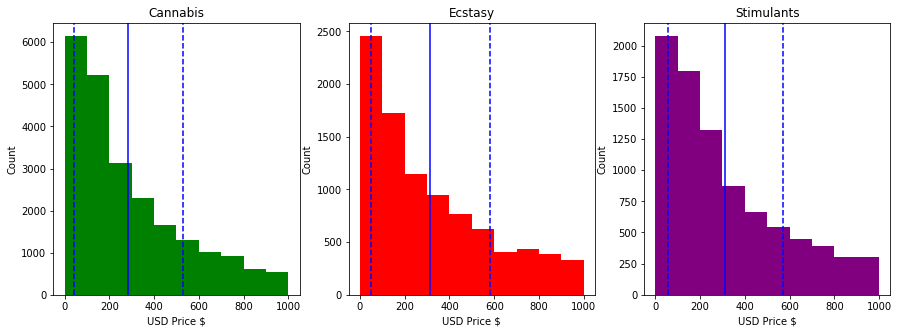

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.hist(Cannabis['USD Price'], color = 'green')
plt.title('Cannabis')
plt.xlabel('USD Price $')
plt.ylabel('Count')
plt.axvline(Cannabis_avg, color = 'b', linestyle='solid')
plt.axvline(Cannabis_avg - Cannabis['USD Price'].std(), color = 'b', linestyle='dashed')
plt.axvline(Cannabis_avg + Cannabis['USD Price'].std(), color = 'b', linestyle='dashed')

plt.subplot(1,3,2)
plt.hist(Ecstasy['USD Price'], color = 'red')
plt.title('Ecstasy')
plt.xlabel('USD Price $')
plt.ylabel('Count')
plt.axvline(Ecstasy_avg, color = 'b', linestyle='solid')
plt.axvline(Ecstasy_avg - Ecstasy['USD Price'].std(), color = 'b', linestyle='dashed')
plt.axvline(Ecstasy_avg + Ecstasy['USD Price'].std(), color = 'b', linestyle='dashed')

plt.subplot(1,3,3)
plt.hist(Stimulants['USD Price'], color = 'purple')
plt.title('Stimulants')
plt.xlabel('USD Price $')
plt.ylabel('Count')
plt.axvline(Stim_avg, color = 'b', linestyle='solid')
plt.axvline(Stim_avg - Stimulants['USD Price'].std(), color = 'b', linestyle='dashed')
plt.axvline(Stim_avg + Stimulants['USD Price'].std(), color = 'b', linestyle='dashed')
plt.show()

In [19]:
#Not surprisingly, there were a lot of sales of each of the top 3 drugs $100 or less. Each drug shows a similar trend.

#Now that we know that Cannabis is the most sold drug on the Dark net, let's see what Vendor sold the most Cannabis.

In [20]:
Vendor = Cannabis.groupby('Vendor').sum()
Vendor.sort_values(by=['USD Price'], ascending = False)

,Bitcoin Price,USD Price
Vendor,,
medibuds,186.662328,139996.745635
SAGreat,113.794212,85345.658838
BudMasterGeneral,107.575393,80681.544941
StrattonOakmont,100.312556,75234.417007
CB2013,93.359732,70019.799252
WeedConnect,77.060884,57795.663000
DrEarnhardt,75.990406,56992.804328
budbrother,72.143846,54107.884852
Drugs4you,71.405514,53554.135774


In [21]:
#The Vendor Medibuds sold the most Cannabis on the Dark net in terms of USD $, selling $140K in Cannabis

#Let's review what vendor sold the most Cannbis in terms of volume
Vendor_count = Cannabis.groupby('Vendor').count()
Vendor_count.sort_values(by=['USD Price'], ascending = False)

,Category,SubCat 1,SubCat2,Price,Bitcoin Price,USD Price
Vendor,,,,,,
medibuds,487,487,487,487,487,487
StrattonOakmont,268,268,268,268,268,268
BudMasterGeneral,268,268,268,268,268,268
Lion,250,250,250,250,250,250
budbrother,212,212,212,212,212,212
WeedConnect,197,197,197,197,197,197
Drugs4you,187,187,187,187,187,187
DrEarnhardt,184,184,184,184,184,184
Colorado,170,170,170,170,170,170


In [22]:
Vendor_count.loc['medibuds', 'Category'] / Cannabis['USD Price'].count()

0.021330646927423241

In [23]:
#The Vendor Medibuds also had the most Cannabis sales in terms of Volume. There's a 2% chance that a Cannabis sale on the 
#Dark Net is made by the vendor Medibuds.